In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
gen = ImageDataGenerator(rescale = 1 / 255.0,
                         rotation_range = 10,
                         shear_range = 0.2,
                         horizontal_flip = True)

In [3]:
import zipfile

with zipfile.ZipFile('/content/test_img_dir.zip') as target_file:
  target_file.extractall('test_img_dir/')

In [17]:
data_gen = gen.flow_from_directory(directory = '/content/test_img_dir/',
                                   batch_size = 3,
                                   shuffle = True,
                                   target_size = (100, 100),
                                   class_mode = 'sparse')

print(data_gen.class_indices)
print(data_gen.num_classes)
print(data_gen.class_mode)

Found 12 images belonging to 3 classes.
{'cat': 0, 'deer': 1, 'dog': 2}
3
sparse


In [13]:
class_names = {0 : 'cat', 1 : 'deer', 2 : 'dog'}

label =>  0.0
label =>  1.0
label =>  0.0


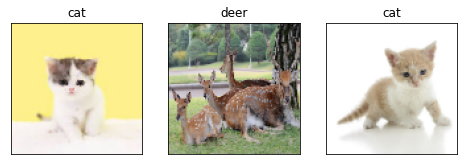

In [22]:
img, label = data_gen.next()

for i in range(len(label)):
  print('label => ', label[i])

plt.figure(figsize = (8, 8))
for i in range(len(img)):

  plt.subplot(1, len(img), i+1)
  plt.xticks([])
  plt.yticks([])
  plt.title(str(class_names[int(label[i])])) # one-hot encoding -> 십진수 -> 이름 === user-friendly coding
  plt.imshow(img[i])

plt.show()